
Naive Bayes Model
Accuracy: 0.8001
Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89     69663
           1       0.50      0.00      0.00     17408

    accuracy                           0.80     87071
   macro avg       0.65      0.50      0.44     87071
weighted avg       0.74      0.80      0.71     87071


Random Forest Model
Accuracy: 0.7732
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86     69663
           1       0.40      0.27      0.32     17408

    accuracy                           0.77     87071
   macro avg       0.62      0.58      0.59     87071
weighted avg       0.74      0.77      0.76     87071



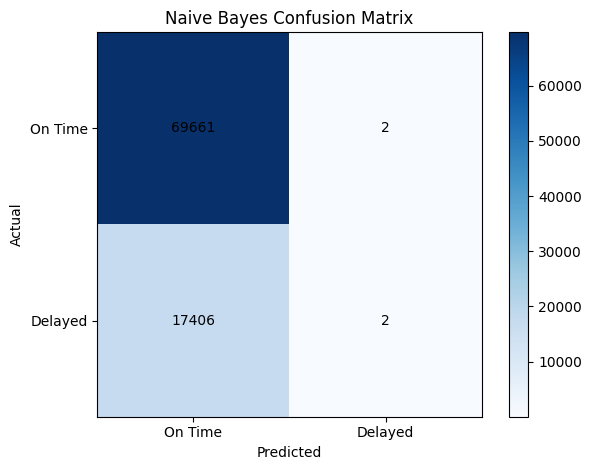

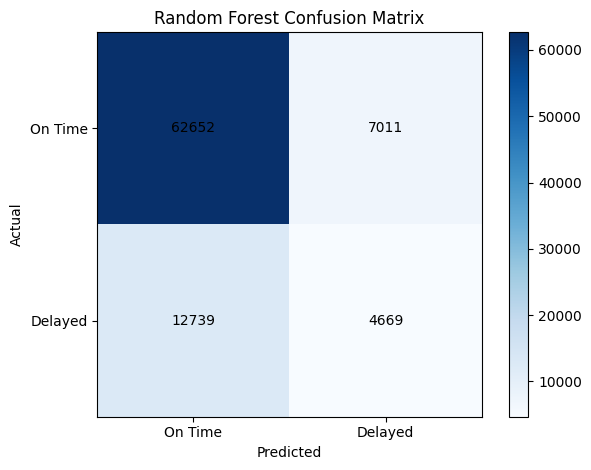

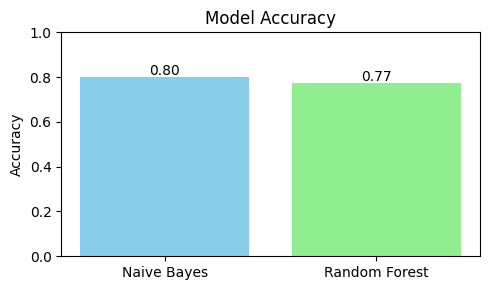

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv('flights.csv')

# Create target: 1 if delayed > 15 mins
df['is_delayed'] = (df['arr_delay'] > 15).astype(int)

# Select features and drop missing
features = ['month', 'day', 'hour', 'minute', 'carrier', 'origin', 'dest', 'distance']
df = df.dropna(subset=features + ['is_delayed'])

# Encode categories
for col in ['carrier', 'origin', 'dest']:
    df[col] = LabelEncoder().fit_transform(df[col])

# Prepare input/output
X = df[features]
y = df['is_delayed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Train models
models = {
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(random_state=42)
}

accuracies = {}
for name, model in models.items():
    print(f"\n{name} Model")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies[name] = acc
    print("Accuracy:", round(acc, 4))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure()
    plt.imshow(cm, cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.xticks([0,1], ['On Time', 'Delayed'])
    plt.yticks([0,1], ['On Time', 'Delayed'])
    for i in range(2):
        for j in range(2):
            plt.text(j, i, cm[i,j], ha='center', va='center')
    plt.colorbar()
    plt.tight_layout()
# Accuracy bar chart
plt.figure(figsize=(5,3))
plt.bar(accuracies.keys(), accuracies.values(), color=['skyblue', 'lightgreen'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for i, acc in enumerate(accuracies.values()):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center')
plt.tight_layout()
plt.show()
